## Import library + Data Exploration

In [ ]:
from google.colab import drive
#mount you GoogleDrive to "drive" folder
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [ ]:
path = '/drive/MyDrive/final_timeseries/Heartsound/'

In [ ]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf

In [ ]:
print(os.listdir(path))

['murmur', 'normal', 'artifact', 'extrahls', 'unlabel']


In [ ]:
train_data      = path 
unlabel_data        = path  + "/unlabel/"

normal_data     = train_data + '/normal/'
murmur_data     = train_data + '/murmur/'
artifact_data   = train_data + '/artifact/'
extrahls_data   = train_data + "/extrahls/"

In [ ]:
# แสดงจำนวนไฟล์เสียงแต่ละประเภทสำหรับการ training
print("Normal files:", len(os.listdir(normal_data)))
print("Murmur files:",len(os.listdir(murmur_data)))
print("Artifact files:",len(os.listdir(artifact_data)))
print("Extrahls files:",len(os.listdir(extrahls_data)))

print('TOTAL TRAIN SOUNDS:', len(os.listdir(normal_data)) 
                              + len(os.listdir(murmur_data))
                              + len(os.listdir(artifact_data))
                              + len(os.listdir(extrahls_data)))

Normal files: 31
Murmur files: 34
Artifact files: 40
Extrahls files: 19
TOTAL TRAIN SOUNDS: 124


In [ ]:
# แสดงจำนวนไฟล์เสียงสำหรับ testing
print("Test sounds: ", len(os.listdir(unlabel_data)))

Test sounds:  52


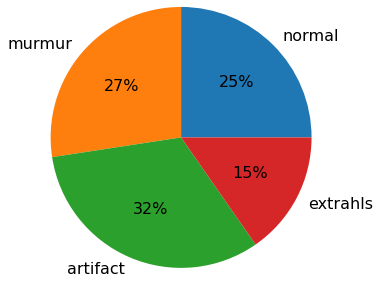

In [ ]:
# แสดงสัดส่วนไฟล์เสียงแต่ละประเภท
x = np.array([len(os.listdir(normal_data)),
              len(os.listdir(murmur_data)),
              len(os.listdir(artifact_data)),
              len(os.listdir(extrahls_data))])
labels = ['normal', 'murmur', 'artifact', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

# normal sound

แสดงตัวอย่างไฟล์เสียงการเต้นหัวใจปกติ

In [ ]:
# Choose random soud from normal folder
random_normal= np.random.randint(0,len(os.listdir(normal_data))) 
normal_sound = os.listdir(normal_data)[random_normal]
normal_sound_address = normal_data+normal_sound
normal_sound_sample,sample_rate = librosa.load(normal_sound_address)
ipd.Audio(normal_sound_sample,rate=sample_rate)

แสดงตัวอย่าง amplitude ของเสียงการเต้นหัวใจปกติ

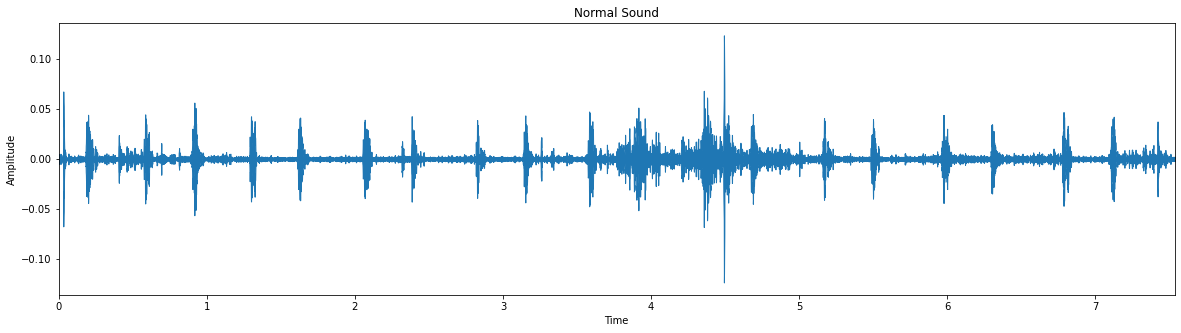

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(normal_sound_sample, sr = sample_rate)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# murmur sound

แสดงตัวอย่างไฟล์เสียงการเต้นหัวใจประเภทลิ้นหัวใจรั่ว

In [ ]:
  # Choose random soud from murmur folder
random_murmur= np.random.randint(0,len(os.listdir(murmur_data))) 
murmur_sound = os.listdir(murmur_data)[random_murmur]
murmur_sound_address = murmur_data+murmur_sound
murmur_sound_sample,sample_rate = librosa.load(murmur_sound_address)
ipd.Audio(murmur_sound_sample,rate=sample_rate)

แสดงตัวอย่าง amplitude ของเสียงการเต้นหัวใจประเภทลิ้นหัวใจรั่ว

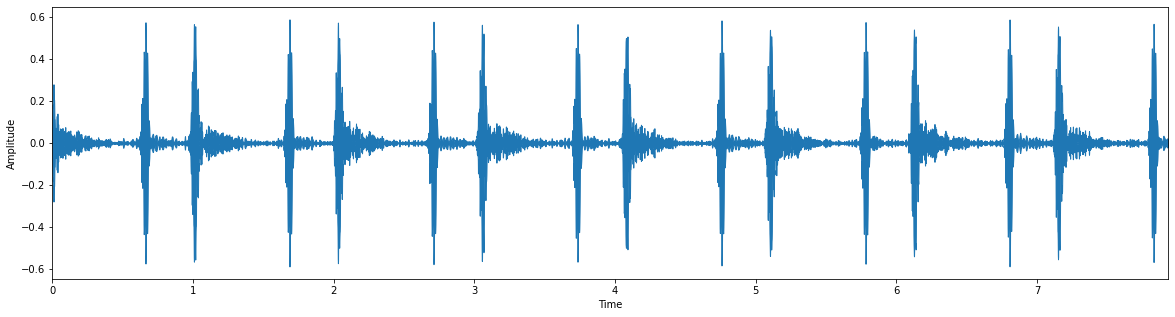

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(murmur_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# artifact sound

แสดงตัวอย่างไฟล์เสียงการเต้นหัวใจประเภทมีเสียงอื่นๆรบกวน

In [ ]:
# Choose random soud from artifact folder
random_artifact= np.random.randint(0,len(os.listdir(artifact_data))) 
artifact_sound = os.listdir(artifact_data)[random_artifact]
artifact_sound_address = artifact_data+artifact_sound
artifact_sound_sample,sample_rate = librosa.load(artifact_sound_address)
ipd.Audio(artifact_sound_sample,rate=sample_rate)

แสดงตัวอย่าง amplitude ของเสียงการเต้นหัวใจประเภทมีเสียงอื่นๆรบกวน

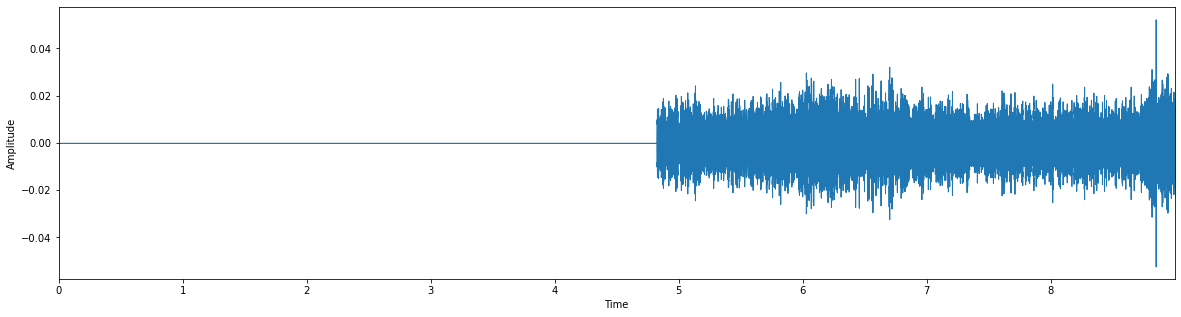

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(artifact_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# Extrahls sound

แสดงตัวอย่างไฟล์เสียงการเต้นหัวใจประเภทอัตราการเต้นปกติแต่มีความดังของเสียงที่ผิดปกติ

In [ ]:
# Choose random soud from extrahls folder
random_extrahls= np.random.randint(0,len(os.listdir(extrahls_data))) 
extrahls_sound = os.listdir(extrahls_data)[random_extrahls]
extrahls_sound_address = extrahls_data+extrahls_sound
extrahls_sound_sample,sample_rate = librosa.load(extrahls_sound_address)
ipd.Audio(extrahls_sound_sample,rate=sample_rate)

แสดงตัวอย่าง amplitude ของเสียงการเต้นหัวใจประเภทอัตราการเต้นปกติแต่มีความดังของเสียงที่ผิดปกติ

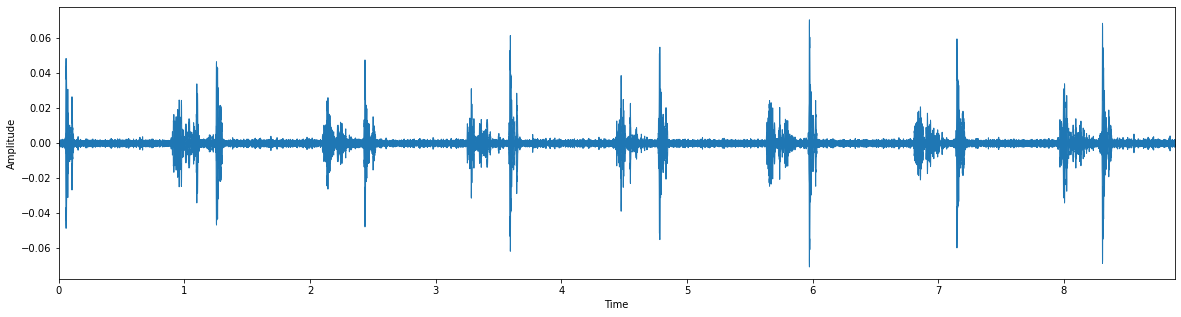

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(extrahls_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# Loading Data

สร้างฟังชั่นสำหรับ loading data ไฟล์เสียงเพื่อใช้ในการสร้าง model

In [ ]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

# Preprocessing

Encoding

In [ ]:
# simple encoding of categories, convert to only 3 types:
# Normal (Include extrahls and extrastole)
# Murmur
# Artifact
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


loading data

In [ ]:
# 22 KHz
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10

artifact_files = fnmatch.filter(os.listdir(artifact_data), 'artifact*.wav')
artifact_sounds = load_file_data (folder=artifact_data, file_names = artifact_files, duration=MAX_SOUND_CLIP_DURATION)
artifact_labels = [0 for items in artifact_files]

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

extrahls_files = fnmatch.filter(os.listdir(extrahls_data), 'extrahls*.wav')
extrahls_sounds = load_file_data(folder=extrahls_data,file_names=extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
extrahls_labels = [2 for items in extrahls_sounds]

murmur_files = fnmatch.filter(os.listdir(murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=murmur_data,file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_files]



print ("Loading Done")

load file  /drive/MyDrive/final_timeseries/Heartsound//artifact/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  /drive/MyDrive/final_timeseries/Heartsound//artifact/artifact__201105190800.wav
fixing audio lenght : artifact__201105190800.wav
load file  /drive/MyDrive/final_timeseries/Heartsound//artifact/artifact__201106030612.wav
fixing audio lenght : artifact__201106030612.wav
load file  /drive/MyDrive/final_timeseries/Heartsound//artifact/artifact__201106010602.wav
fixing audio lenght : artifact__201106010602.wav
load file  /drive/MyDrive/final_timeseries/Heartsound//artifact/artifact__201105051017.wav
fixing audio lenght : artifact__201105051017.wav
load file  /drive/MyDrive/final_timeseries/Heartsound//artifact/artifact__201105041959.wav
fixing audio lenght : artifact__201105041959.wav
load file  /drive/MyDrive/final_timeseries/Heartsound//artifact/artifact__201106040722.wav
fixing audio lenght : artifact__201106040722.wav
load file  /drive/My

In [ ]:
# unlabel_datala files
Bunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Bunlabelledtest*.wav')
Bunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Bunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Bunlabelledtest_labels = [-1 for items in Bunlabelledtest_sounds]

Aunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Aunlabelledtest*.wav')
Aunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Aunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Aunlabelledtest_labels = [-1 for items in Aunlabelledtest_sounds]


print ("Loading of unlabel data done")

load file  /drive/MyDrive/final_timeseries/Heartsound//unlabel/Aunlabelledtest__201012172010.wav
fixing audio lenght : Aunlabelledtest__201012172010.wav
load file  /drive/MyDrive/final_timeseries/Heartsound//unlabel/Aunlabelledtest__201101061552.wav
fixing audio lenght : Aunlabelledtest__201101061552.wav
load file  /drive/MyDrive/final_timeseries/Heartsound//unlabel/Aunlabelledtest__201101091156.wav
fixing audio lenght : Aunlabelledtest__201101091156.wav
load file  /drive/MyDrive/final_timeseries/Heartsound//unlabel/Aunlabelledtest__201101152256.wav
fixing audio lenght : Aunlabelledtest__201101152256.wav
load file  /drive/MyDrive/final_timeseries/Heartsound//unlabel/Aunlabelledtest__201101110659.wav
fixing audio lenght : Aunlabelledtest__201101110659.wav
load file  /drive/MyDrive/final_timeseries/Heartsound//unlabel/Aunlabelledtest__201101051105.wav
fixing audio lenght : Aunlabelledtest__201101051105.wav
load file  /drive/MyDrive/final_timeseries/Heartsound//unlabel/Aunlabelledtest__20

concatenation

In [ ]:
#combine data
x_data = np.concatenate((artifact_sounds, normal_sounds,extrahls_sounds,murmur_sounds))

y_data = np.concatenate((artifact_labels, normal_labels,extrahls_labels,murmur_labels))

test_x = ((Aunlabelledtest_sounds))
test_y = ((Aunlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  124 52


In [ ]:
x_data.shape

(124, 25, 1)

# train_test_validation split

In [ ]:
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

In [ ]:
TRAIN_IMG_COUNT = 124
COUNT_0 = 40  #artifact
COUNT_1 = 34 #murmur
COUNT_2 = 31 #normal
weight_for_0 = TRAIN_IMG_COUNT / (3 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (3 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (3 * COUNT_2)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weight

{0: 1.0333333333333334, 1: 1.2156862745098038, 2: 1.3333333333333333}

# LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 25, 256)          133120    
 l)                                                              
                                                                 
 dense (Dense)               (None, 25, 128)           32896     
                                                                 
 dropout (Dropout)           (None, 25, 128)           0         
                                                                 
 dense_1 (Dense)             (None, 25, 128)           16512     
                                                                 
 dense_2 (Dense)             (None, 25, 64)            8256      
                                                                 
 dense_3 (Dense)             (None, 25, 64)            4160      
                                                        

In [ ]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=30,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val)) 

Epoch 1/30
27/27 [==============================] - 11s 187ms/step - loss: 1.0974 - acc: 0.5316 - val_loss: 0.7601 - val_acc: 0.6500 - lr: 0.0010
Epoch 2/30
27/27 [==============================] - 4s 163ms/step - loss: 0.7270 - acc: 0.7975 - val_loss: 0.7056 - val_acc: 0.7000 - lr: 8.0000e-04
Epoch 3/30
27/27 [==============================] - 4s 162ms/step - loss: 0.6228 - acc: 0.7975 - val_loss: 0.7264 - val_acc: 0.7500 - lr: 6.4000e-04
Epoch 4/30
27/27 [==============================] - 4s 158ms/step - loss: 0.5134 - acc: 0.8228 - val_loss: 0.7873 - val_acc: 0.7000 - lr: 5.1200e-04
Epoch 5/30
27/27 [==============================] - 4s 156ms/step - loss: 0.5230 - acc: 0.8481 - val_loss: 0.7834 - val_acc: 0.7500 - lr: 4.0960e-04
Epoch 6/30
27/27 [==============================] - 4s 158ms/step - loss: 0.4790 - acc: 0.8608 - val_loss: 0.7889 - val_acc: 0.8000 - lr: 3.2768e-04
Epoch 7/30
27/27 [==============================] - 4s 161ms/step - loss: 0.4730 - acc: 0.8354 - val_loss: 0.

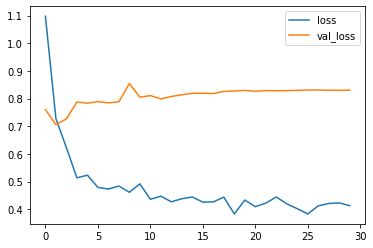

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

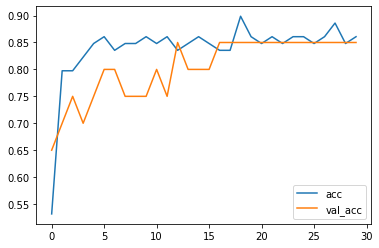

In [ ]:
losses[['acc','val_acc']].plot()

# Prediction

In [ ]:
# make a prediction
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

1/1 [==============================] - 0s 38ms/step - loss: 0.2502 - acc: 0.9200
Model evaluation accuracy:  92 %
